## Fibonacci (naïve recursive and dynamic programming version)

### ## 🎯 Objective
- Implement and analyze recursive and iterative algorithms.
- Compare execution time and memory usage.
- Visualize performance with plots.
- Understand trade-offs in algorithm design.

### 📌 Algorithms Implemented
- Fibonacci (Recursive & Iterative)
- Merge Sort
- Quick Sort
- Insertion Sort
- Bubble Sort
- Selection Sort
- Binary Search

### Implementations:
1. **Recursive (naïve)** – directly applies the mathematical recurrence `F(n) = F(n-1) + F(n-2)`.  
   - Exponential time complexity: `O(2^n)`
   - High recursive depth → risk of stack overflow.
   - Very inefficient for large `n`.

2. **Iterative (Dynamic Programming)** – builds sequence iteratively using a loop.
   - Linear time complexity: `O(n)`
   - Much faster, no recursion overhead.
   - Space efficient: `O(1)` extra space.

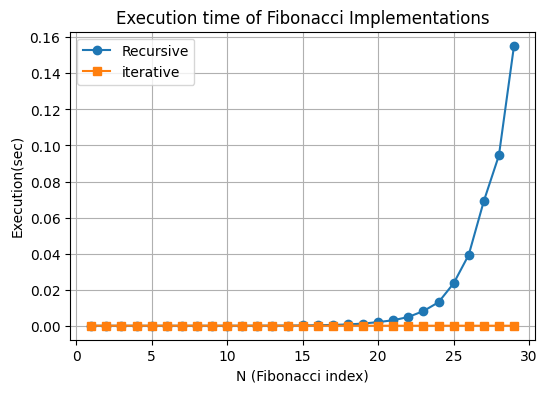

In [ ]:
import matplotlib.pyplot as plt
import time

def fibonacci_iter(n):
    a=0
    b=1
    if(n == 0):
        return a
    elif(n < 0):
        return "Invalid input"
    else:
        for i in range(1,n):
            c = a+b
            a = b
            b = c
        return b



def fibonacci_rec(n):
    if(n < 0):
        return "Invalid input"
    elif(n == 0):
        return 0
    elif(n == 1):
        return 1
    else:
        return fibonacci_rec(n-1) + fibonacci_rec(n-2)



ns = list(range(1,30))

recursive_times = []
iterative_times = []


for i in ns:
    start = time.perf_counter()
    fibonacci_rec(i)
    recursive_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    fibonacci_iter(i)
    iterative_times.append(time.perf_counter() - start)

plt.figure(figsize=(6,4))
plt.plot(ns, recursive_times, label="Recursive", marker = "o")
plt.plot(ns, iterative_times, label="iterative", marker = "s")
plt.xlabel("N (Fibonacci index)")
plt.ylabel("Execution(sec)")
plt.title("Execution time of Fibonacci Implementations")
plt.legend()
plt.grid()
plt.show()



### 📊 Observations
- The recursive implementation grows **exponentially** and becomes impractical beyond `n ≈ 30`.
- The iterative implementation is almost flat and negligible in execution time.
- This demonstrates why dynamic programming/iterative methods are preferred in real-world applications.


## Sorting Algorithms

We implemented and compared 5 sorting algorithms:

| Algorithm       | Best Case    | Average Case | Worst Case   | Space Complexity |
|-----------------|-------------|--------------|--------------|------------------|
| Merge Sort      | O(n log n)  | O(n log n)   | O(n log n)   | O(n)             |
| Quick Sort      | O(n log n)  | O(n log n)   | O(n^2)       | O(log n)         |
| Insertion Sort  | O(n)        | O(n^2)       | O(n^2)       | O(1)             |
| Bubble Sort     | O(n)        | O(n^2)       | O(n^2)       | O(1)             |
| Selection Sort  | O(n^2)      | O(n^2)       | O(n^2)       | O(1)             |

### Key Points:
- **Merge Sort** is stable, consistent, and good for large datasets, but uses extra space.
- **Quick Sort** is fast on average but has poor worst-case performance (can be improved with randomized pivots).
- **Insertion Sort** is efficient for small or nearly sorted datasets.
- **Bubble Sort** and **Selection Sort** are primarily educational (inefficient in practice).


In [ ]:
#  Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

#  Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

#  Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#  Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


## Binary Search

Binary Search is a classic **divide-and-conquer** algorithm used on sorted arrays.

- **Time Complexity:**  
  - Best Case: `O(1)`  
  - Average/Worst Case: `O(log n)`

- **Space Complexity:**  
  - Iterative: `O(1)`  
  - Recursive: `O(log n)` due to call stack.

### 📊 Observations
- Extremely efficient compared to linear search.
- Scales well for large datasets.
- Requires sorted input.


In [ ]:
def binary_search(arr, x):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return -1


In [ ]:
# Different test cases
def generate_best_case(n):
    return list(range(n))

def generate_worst_case(n):
    return list(range(n, 0, -1))

def generate_average_case(n):
    return list(range(n))


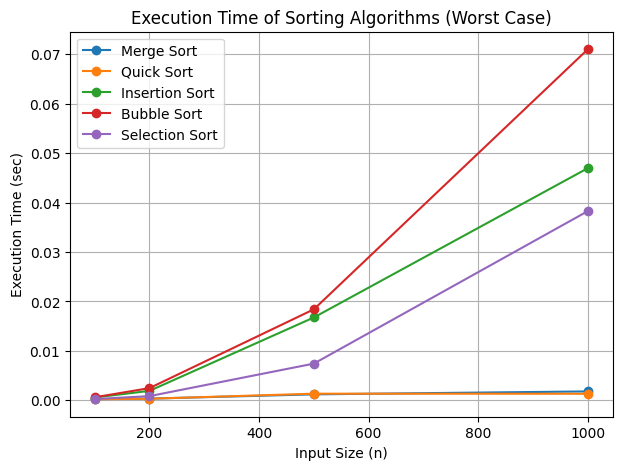

In [ ]:
algorithms = {
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort
}

ns = [100, 200, 500, 1000]
results = {name: [] for name in algorithms}

for n in ns:
    arr = generate_worst_case(n)
    for name, func in algorithms.items():
        test_arr = arr.copy()
        start = time.perf_counter()
        func(test_arr)
        results[name].append(time.perf_counter() - start)

plt.figure(figsize=(7,5))
for name, times in results.items():
    plt.plot(ns, times, marker="o", label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (sec)")
plt.title("Execution Time of Sorting Algorithms (Worst Case)")
plt.legend()
plt.grid()
plt.show()


## Sorting Algorithms

We implemented and compared 5 sorting algorithms:

| Algorithm       | Best Case    | Average Case | Worst Case   | Space Complexity |
|-----------------|-------------|--------------|--------------|------------------|
| Merge Sort      | O(n log n)  | O(n log n)   | O(n log n)   | O(n)             |
| Quick Sort      | O(n log n)  | O(n log n)   | O(n^2)       | O(log n)         |
| Insertion Sort  | O(n)        | O(n^2)       | O(n^2)       | O(1)             |
| Bubble Sort     | O(n)        | O(n^2)       | O(n^2)       | O(1)             |
| Selection Sort  | O(n^2)      | O(n^2)       | O(n^2)       | O(1)             |

### Key Points:
- **Merge Sort** is stable, consistent, and good for large datasets, but uses extra space.
- **Quick Sort** is fast on average but has poor worst-case performance (can be improved with randomized pivots).
- **Insertion Sort** is efficient for small or nearly sorted datasets.
- **Bubble Sort** and **Selection Sort** are primarily educational (inefficient in practice).


### 📊 Observations
- Merge Sort and Quick Sort scale much better than Insertion, Bubble, and Selection Sort.
- For small `n`, the difference is less visible, but as input grows, **O(n log n)** algorithms clearly outperform **O(n^2)** ones.
- Bubble Sort and Selection Sort are consistently the slowest.


# ✅ Final Summary

- Recursive Fibonacci is **inefficient**, while Iterative (DP) is practical.  
- **Merge Sort** and **Quick Sort** are suitable for large datasets.  
- **Insertion Sort** can be useful for small or nearly sorted arrays.  
- **Bubble Sort** and **Selection Sort** are not practical beyond small inputs.  
- **Binary Search** is one of the most efficient searching techniques for sorted data.

## 💡 Reflection
Expected theoretical complexities matched well with observed results:
- Recursive algorithms suffer from exponential blowup.
- Iterative/dynamic programming versions are efficient.
- Sorting algorithm performance aligns with time complexity theory.

This analysis highlights the importance of **choosing the right algorithm** for a given problem in software engineering.
